<a href="https://colab.research.google.com/github/Mina-Moeini/Image-Processing-mathematical-morphology/blob/main/mathematical_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from skimage import io as skio
from skimage import feature
import skimage.morphology as morpho
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import segmentation
from skimage.draw import line
import skimage.feature as skf
from skimage.morphology import dilation, erosion, opening , closing , reconstruction
from scipy import ndimage as ndi

In [ ]:
def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.diamond(taille)
    if forme == 'disk':
        return morpho.disk(taille)
    if forme == 'square':
        return morpho.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')


In [ ]:
def couleurs_alea(im):
    """
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

# Mathematical morphology on gray-scale images
**1- Apply dilation, erosion, opening and closing with various structuring elements, by varying
the shape and the size (functions morpho.dilation, morpho.erosion, morpho.opening,
morpho.closing1).What is the influence of the size and the shape of the structuring element?**

The choice of the size and shape of the structuring element in morphological operations has a significant impact on the results.
size of the structuring element: like we can see in the below a smaller size of structuring element will result in finer details being preserved in the processed image and we can see more smallere features and edges.larger size of structruring element has a smoothing effect on the image and it can eliminate smaller details or noise.
Choosing different shapes also has a great impact on the results, and its choice depends on our goal and the type of photo.
Square: A square structuring element is often used for simple morphological operations.
Diamond: A diamond-shaped structuring element can produce similar effects to a square but is often used when you want to capture diagonal features as well.
Line: A linear structuring element can capture linear or elongated features in the image.


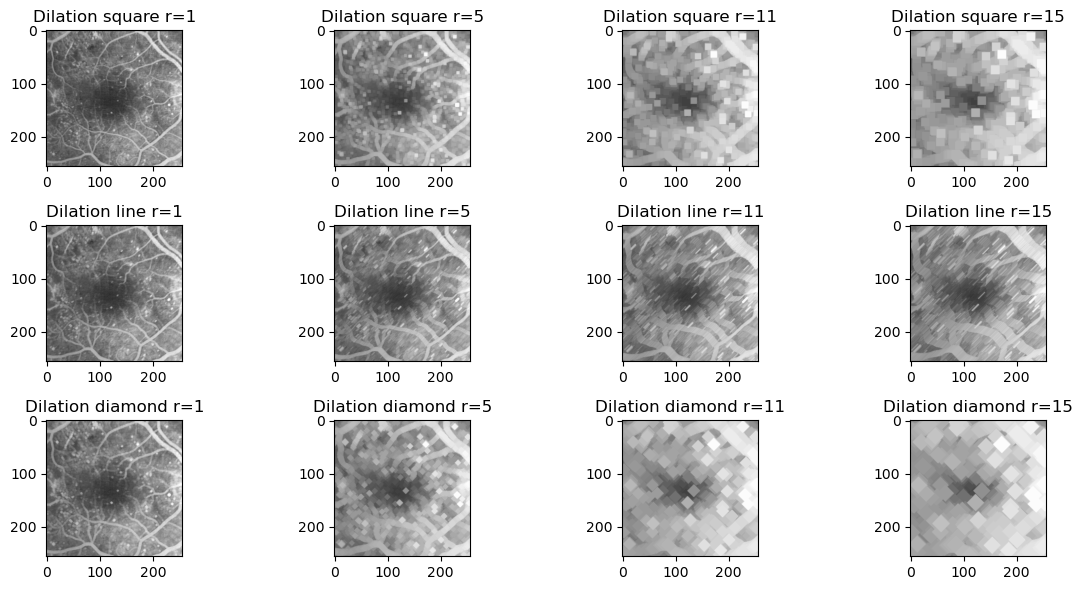

In [ ]:
# Read the image
im = skio.imread('retina2.gif')

# Create lists of parameters
r_values = [1, 5, 11, 15]
shapes = ['square', 'line', 'diamond']

# Create a figure to display images
plt.figure(figsize=(12, 6))
#......................................Daliation.........................................
# Process and display each structuring element, r value, and morphological operation
for i, shape in enumerate(shapes):
    for j, r in enumerate(r_values):
        se = strel (shape, r_values[j])
        result = dilation(im, se)

        # Display the result of the operation
        plt.subplot(len(shapes), len(r_values), i * len(r_values) + j + 1)
        plt.imshow(result, cmap="gray", vmin=0, vmax=255)
        plt.title(f"Dilation {shape} r={r_values[j]}")

plt.tight_layout()
plt.show()


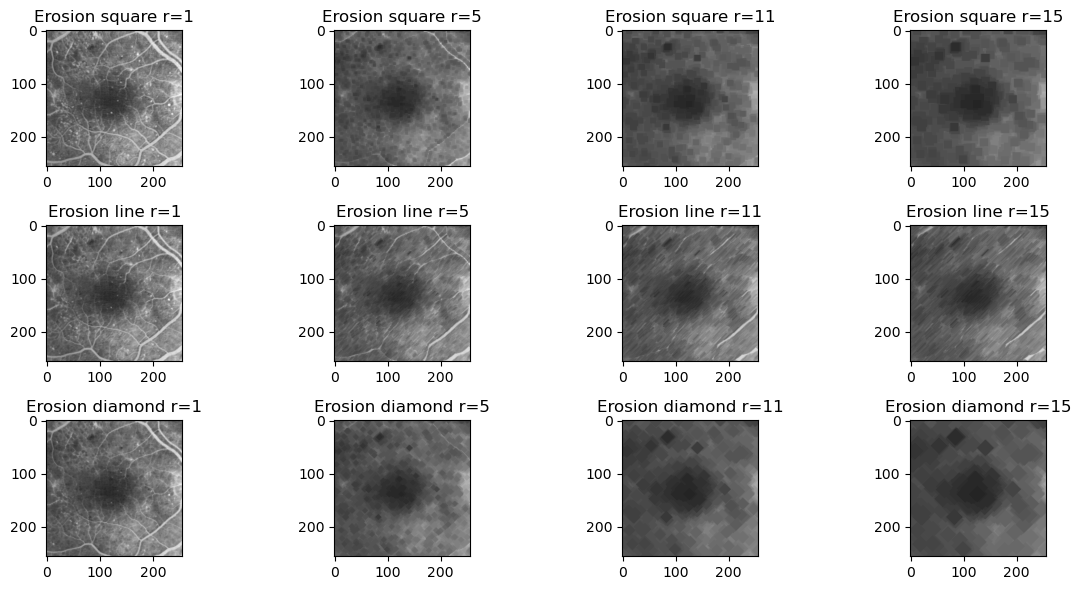

In [ ]:
# Process and display each structuring element, r value, and morphological operation
plt.figure(figsize=(12, 6))
for i, shape in enumerate(shapes):
    for j, r in enumerate(r_values):
        se = strel(shape, r_values[j])
        result=erosion(im,se)
        # Display the result of the operation
        plt.subplot(len(shapes), len(r_values), i * len(r_values) + j + 1)
        plt.imshow(result, cmap="gray", vmin=0, vmax=255)
        plt.title(f"Erosion {shape} r={r_values[j]}")

plt.tight_layout()
plt.show()

**2-Illustrate the properties of these four operations on examples.**

* Dilation : expends bright regions in an image and it increases the size of white regions or enhances the bright features. The stucturing element sets the pixel value to the maximum value in that neighborhood.It's used for expanding object boundaries,filling gaps and joining nearby regions.
* Erosion: shrinks or erodes bright regions in an image.It reduces the size of white regions or removes smaill details.The structuring element sets the pixel value to the minimum value in that neighborhood.It's useful for tasks such as removing small noise and detecting boundaries.
* Opening: is an operation that first applies erosion, followed by dilation. It is used to remove small objects, noise, or details while preserving the overall shape of larger objects.It can clean up an image by eliminating small artifacts and smoothing the contours of objects.
* Closing: is an operation that first applies dilation, followed by erosion. It is used to close small holes or gaps in bright regions while preserving the overall shape of objects.It's effective in filling holes or gaps in binary images.


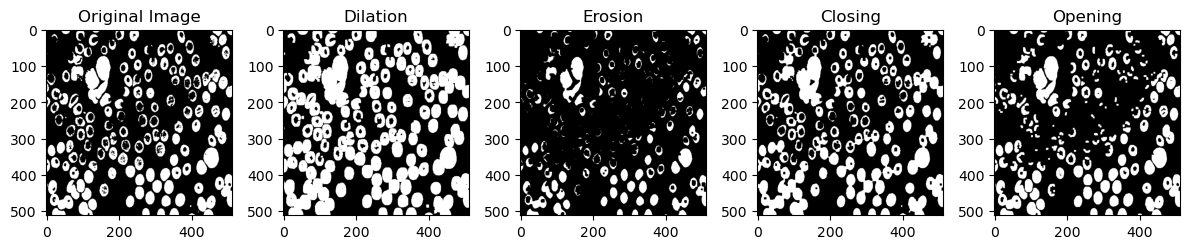

In [ ]:
im=skio.imread('cellbin.bmp')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 5, 1)  # Create a subplot with 1 row and 5 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Original Image")

se=strel('square',5)

models = {
    'dilation': dilation,
    'erosion': erosion,
    'closing': closing,
    'opening': opening
}
#enumerate returns pairs of index and value
for i, model in enumerate(models):

        result=models[model](im,se)
        # Display the result of the operation
        plt.subplot(1, 5, i + 2)  # Position for displaying the result
        plt.imshow(result, cmap="gray", vmin=0, vmax=255)
        plt.title(f"{model.capitalize()}")

plt.tight_layout()
plt.show()


**3. What is the operation equivalent to the succession of a dilation by a square of size 3\*3 and
a dilation by a square of size 5\*5? Same question for opening. What are the properties
of these operations that explain the result?**

* dilation : fot the first part of code we try to set dilation by a square of size 3\*3 and aftre we set another dilation by a square of size 5\*5. For find the equivalent square size structuring element we can use this formula "Equivalent_Size = max(Original_Size1, Original_Size2) + 2" so our the equivalent square size structuring element for this example is 7\*7. You can see the same result in below.Because the stucturing element sets the pixel value to the maximum value in that neighborhood.
* opening : For find the equivalent square size structuring element we can use this formula "Equivalent_Size = min(Original_Size1, Original_Size2) + 2" so our the equivalent square size structuring element for this example is 5\*5.You can see the same result in below. Opening performs erosion first and then it apply dilation so the stucturing element sets the pixel value to the minimum value in that neighborhood.

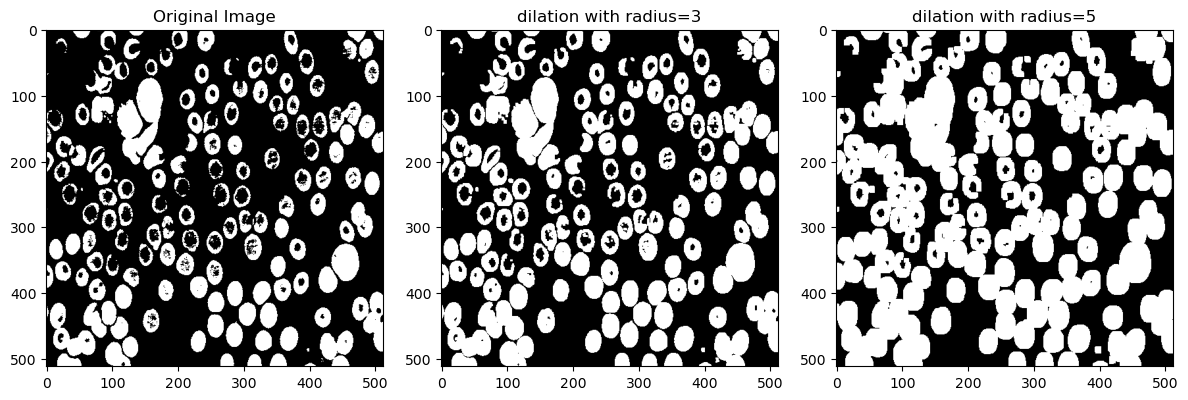

In [ ]:
im=skio.imread('cellbin.bmp')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)  # Create a subplot with 1 row and 3 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Original Image")
#first dilation 3*3
se = strel ('square',3)
dil3=dilation(im,se)
plt.subplot(1, 3, 2)
plt.imshow(dil3, cmap="gray", vmin=0, vmax=255)
plt.title("dilation with radius=3")
#second dilation 5*5
se = strel ('square',5)
dil5=dilation(dil3,se)
plt.subplot(1, 3, 3)
plt.imshow(dil5, cmap="gray", vmin=0, vmax=255)
plt.title("dilation with radius=5")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'dilation with radius=7')

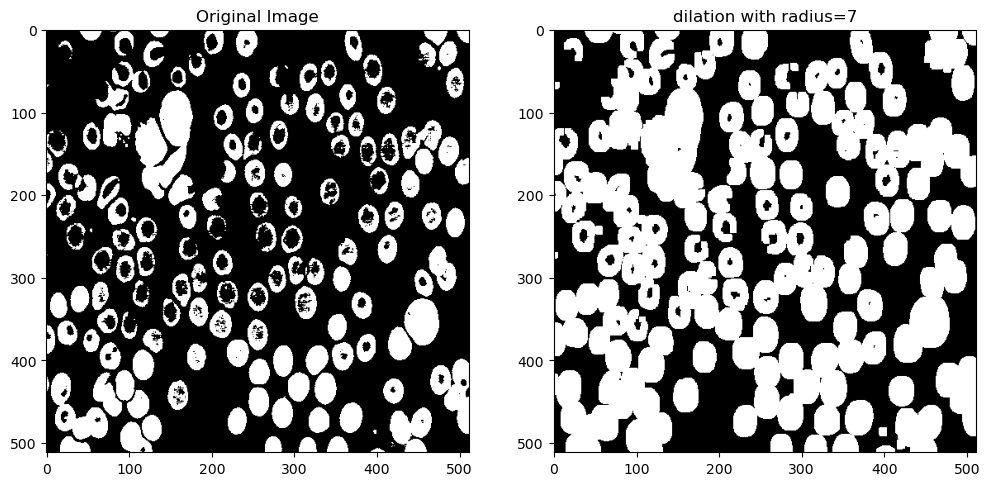

In [ ]:
im=skio.imread('cellbin.bmp')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Original Image")
#first dilation 8*8
se = strel ('square',7)
dil=dilation(im,se)
plt.subplot(1, 2, 2)
plt.imshow(dil, cmap="gray", vmin=0, vmax=255)
plt.title("dilation with radius=7")

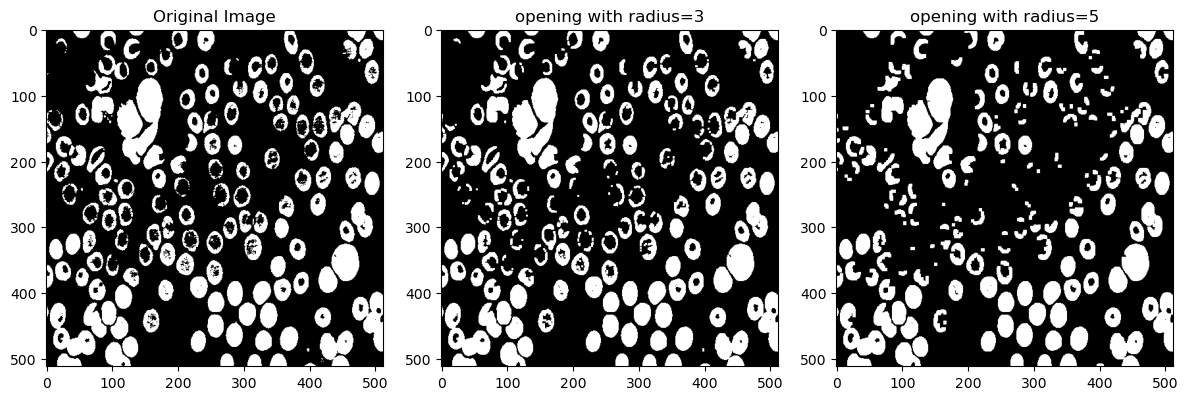

In [ ]:
im=skio.imread('cellbin.bmp')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)  # Create a subplot with 1 row and 3 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Original Image")
#first dilation 3*3
se = strel ('square',3)
op3=opening(im,se)
plt.subplot(1, 3, 2)
plt.imshow(op3, cmap="gray", vmin=0, vmax=255)
plt.title("opening with radius=3")
#second dilation 5*5
se = strel ('square',5)
op5=opening(op3,se)
plt.subplot(1, 3, 3)
plt.imshow(op5, cmap="gray", vmin=0, vmax=255)
plt.title("opening with radius=5")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'opening with radius=5')

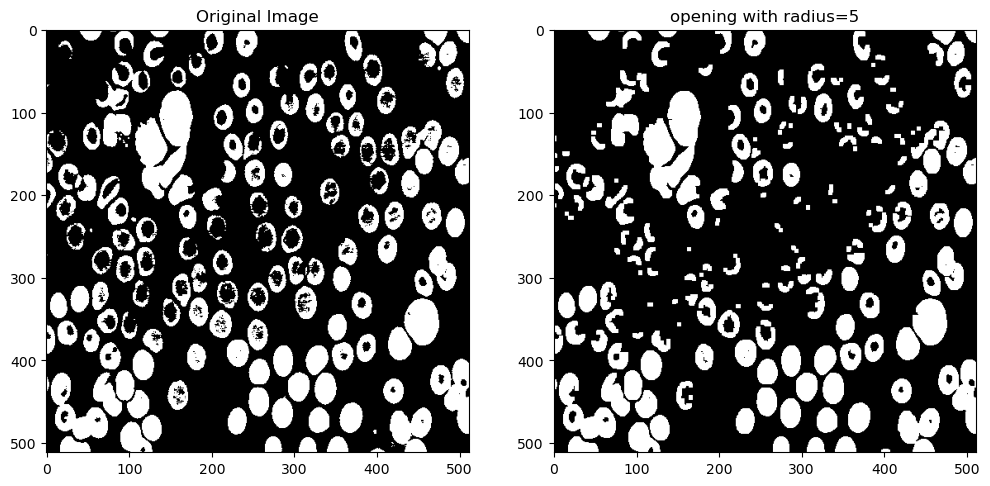

In [ ]:
im=skio.imread('cellbin.bmp')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Original Image")
#first dilation 8*8
se = strel ('square',5)
op=opening(im,se)
plt.subplot(1, 2, 2)
plt.imshow(op, cmap="gray", vmin=0, vmax=255)
plt.title("opening with radius=5")

**4. Apply a top-hat transform (difference of the original image and its opening), for instance on
image retina2.gif. Comment the result, according to the size and shape of the structuring
element. What would be the dual operation (that you can illustrate on image laiton.bmp)?**
We set a top-hat transform with different shapes (square, line, diamond) with different sizes of structuring elements (1,5,11,15)The size and shape of the structuring element used in the opening operation can influence the outcome of the top-hat operation.If the structuring element is small, it will focus on smaller details in the binary image. It can enhance fine details, noise, and small objects in the image. Larger objects or features may not be significantly affected or enhanced. A large structuring element will have the opposite effect. It will enhance larger features in the binary image. Smaller details and noise may be reduced or even completely removed. The output will emphasize larger structures and objects in the image. The shape of the structuring element can also influence the outcome. For example, a rectangular structuring element will enhance features that match its elongated shape. The choice of structuring element should be guided by the nature of the image and the specific features of interest. According to the result obtained from our code for photo 'retina2.gif' , we can conclude that the larger the size structuring element is on this photo, the more accurate details we have compared to our photo, and also square and diamond shapes worked better on our photo.

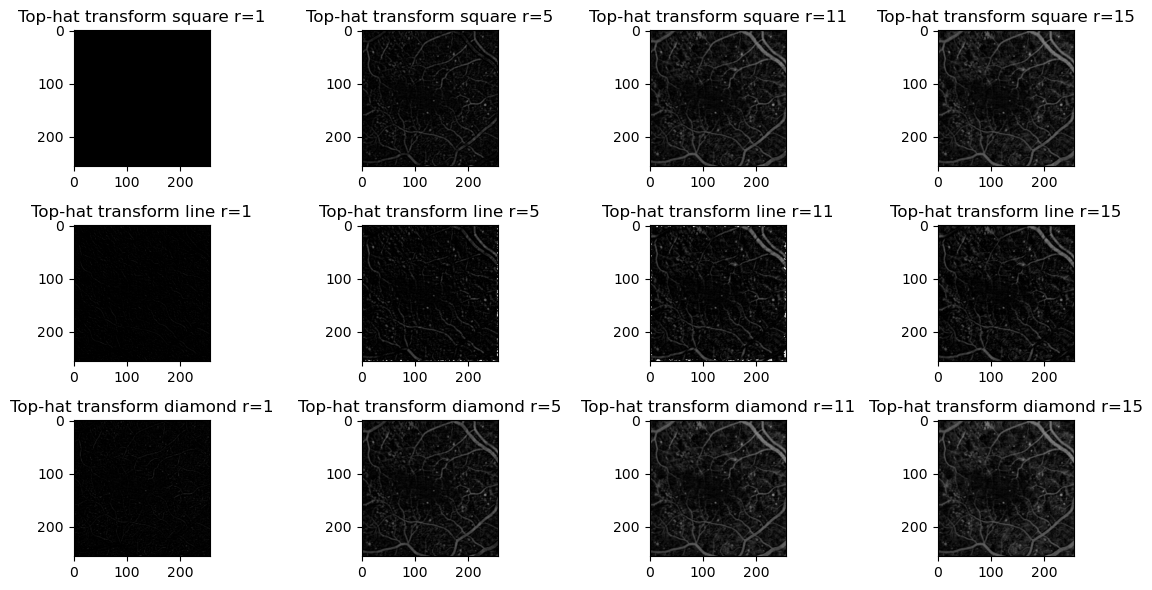

In [ ]:
im=skio.imread('retina2.gif')
# Create lists of parameters
r_values = [1, 5, 11, 15]
shapes = ['square', 'line', 'diamond']

# Create a figure to display images
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
#......................................Daliation.........................................
# Process and display each structuring element, r value, and morphological operation
for i, shape in enumerate(shapes):
    for j, r in enumerate(r_values):
        se = strel (shape, r_values[j])
        result =im-opening(im,se) #top-hat

        # Display the result of the operation
        plt.subplot(len(shapes), len(r_values), i * len(r_values) + j + 1)
        plt.imshow(result, cmap="gray", vmin=0, vmax=255)
        plt.title(f"Top-hat transform {shape} r={r_values[j]}")

plt.tight_layout()
plt.show()

**5. Define segments in several directions, apply an opening with each of them as structuring
element, and compute the point-wise maximum of the results. Conclusion?**

First, we need to define the segments or regions of interest in the binary image. These segments could be objects, structures, or areas that you want to analyze or enhance. For each segment or region of interest, we create a structuring element that matches the shape and orientation of that segment and then we perform a morphological opening operation for each segment using the corresponding structuring element. The opening operation will enhance or extract features within that segment.
To combine the results, we compute the point-wise maximum, which means taking the maximum pixel value for each pixel position across all the images. The result will be a binary image where each pixel represents the maximum value across all the segmented regions.

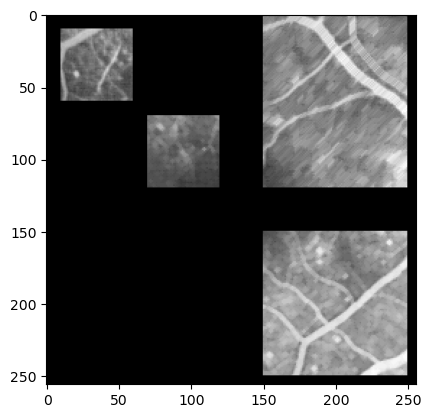

In [ ]:
im=skio.imread('retina2.gif')
# Define segments and structuring elements
segments = []  # List to hold segments
structuring_elements = []  # List to hold structuring elements

# define segments and structuring elements
segment1 = (slice(10, 60), slice(10, 60))
structuring_element1 = strel ('square',1)
segments.append(segment1)
structuring_elements.append(structuring_element1)

segment2 = (slice(70, 120), slice(70, 120))
structuring_element2 = strel ('disk',1)
segments.append(segment2)
structuring_elements.append(structuring_element2)

segment3 = (slice(150, 250), slice(150, 250))
structuring_element3 = strel ('diamond',1)
segments.append(segment3)
structuring_elements.append(structuring_element3)

segment4 = (slice(0, 120), slice(150, 250))
structuring_element4 = strel ('line',4)
segments.append(segment4)
structuring_elements.append(structuring_element4)

# Initialize an empty array to store the results
results = []

# Apply opening with each structuring element to each segment
for segment, structuring_element in zip(segments, structuring_elements):
    result = opening(im[segment], structuring_element)
    results.append(result)

# Compute point-wise maximum of the results
final_result = np.zeros_like(im)

for segment, result in zip(segments, results):
    final_result[segment] = np.maximum(final_result[segment], result)

# display the final result
plt.imshow(final_result,cmap='gray')
plt.show()

# Alternate sequential filters

**Define an alternate sequential filter**

This code applies an alternate sequential filter by repeatedly applying morphological opening and closing operations with circular structuring elements of increasing size (disk). with each iteration, the filter processes the image with structuring elements of different sizes, adapting to enhance or suppress structures of different scales. As you increase the size of the structuring elements, you'll tend to emphasize larger features in the image and reduce smaller details.The filter will adapt to larger structures as you increase the size of the structuring elements.The choice of max_size depends on the specific characteristics of the images we are working with and our desired results.

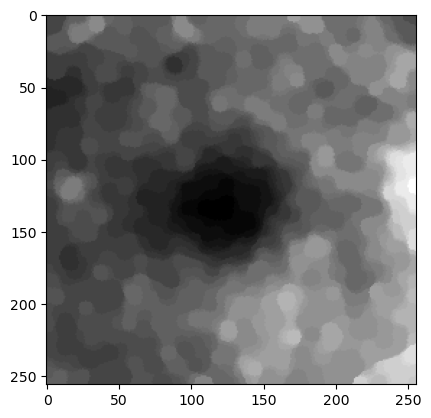

In [ ]:
im=skio.imread('retina2.gif')

#set the maximum size of the structuring element
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
max_size=5

for size in range(1,max_size+1):
    # Define circular (disk) structuring element
    se = strel ('disk', size)

    #apply opening
    results=opening(im,se)
    #apply closing
    results=closing(result,se)

plt.imshow(results,cmap='gray')
plt.show()


# Reconstruction

**1- As an example, the reconstruction of an image from its opening allow recovering small
details of objects that are partially kept by the opening. Test for example (you can change
the structuring element):**

The opening operation typically removes small structures, noise, and enhances larger features in the image. In this case, it will remove small details from the input image.The reconstruction operation (morpho.reconstruction) is used with the result of the opening operation (open4) and the original image (im). Reconstruction helps in recovering some of the details that were partially removed by the opening operation. It retains structures that are partially preserved by the opening while reducing noise. The reco variable now contains the result of the reconstruction operation, which is an image that attempts to recover small details of objects that were partially kept by the opening. This can be useful for feature preservation and noise reduction in image processing. By fine-tuning the structuring element and applying different morphological operations, we can control the extent of detail preservation and noise reduction in the reconstructed image.

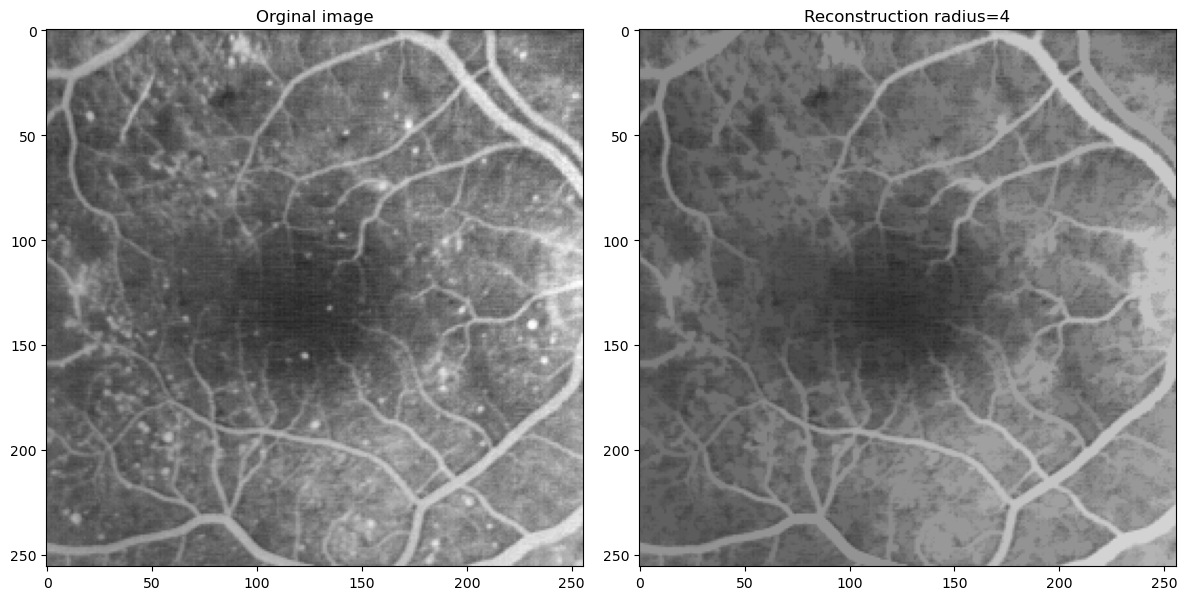

In [ ]:

im=skio.imread('retina2.gif')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Orginal image")

se4 = strel('disk',4)
open4 = opening(im,se4)
reco= reconstruction(open4,im)

plt.subplot(1, 2, 2)
plt.imshow(reco, cmap="gray", vmin=0, vmax=255)
plt.title("Reconstruction radius=4")
plt.tight_layout()
plt.show()


**2. Write the sequence of operators for a reconstruction by erosion. How could this reconstruction
be derived from a reconstruction by dilation using duality principle?**

To derive the sequence of operators for reconstruction by erosion from a reconstruction by dilation using the duality principle,
we start with the sequence of operators for reconstruction by dilation.
In the sequence for dilation-based reconstruction, we have the marker image and the mask image. Invert the colors of both images by taking the complement of each pixel ( make white pixels black and vice versa).The marker image for erosion-based reconstruction is now the complement of the mask image from dilation-based reconstruction, and vice versa. In the sequence for erosion-based reconstruction, apply erosion operations instead of dilation operations.Use the structuring element in the same way as in dilation-based reconstruction to guide the erosion process. After applying erosion operations in the sequence, invert the colors of both the marker image and the result of the erosion operations. This step will restore the original color representations.
The result of this process will be the sequence of operators for reconstruction by erosion. It's essentially the mirrored version of the sequence for reconstruction by dilation, with dilation operations replaced by erosion operations and vice versa.
The duality principle in mathematical morphology ensures that you can switch between dilation and erosion while preserving the fundamental characteristics of the underlying images.

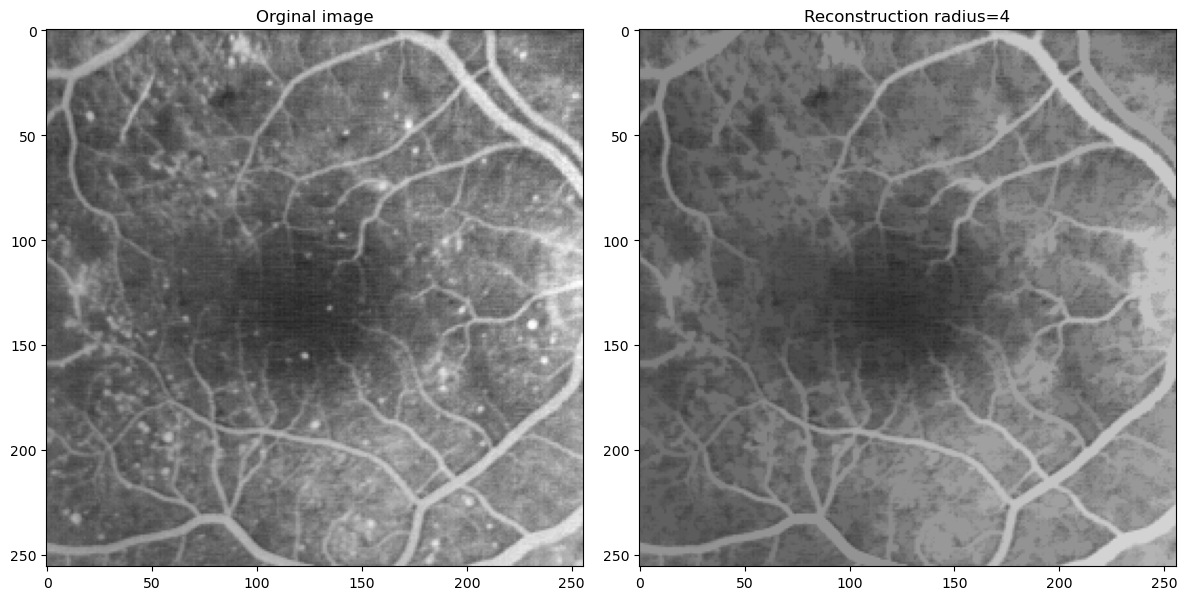

In [ ]:
#the sequence of operators for a reconstruction by erosion
im=skio.imread('retina2.gif')
# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, first position
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.title("Orginal image")

se4 = strel('disk',4)
ero = erosion(im,se4)
reco_ero= reconstruction(ero,im)
plt.subplot(1, 2, 2)
plt.imshow(reco_ero, cmap="gray", vmin=0, vmax=255)
plt.title("Reconstruction radius=4")
plt.tight_layout()
plt.show()


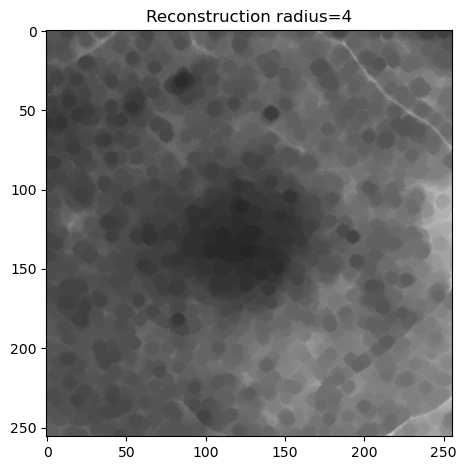

In [ ]:

# Load the image
im=skio.imread('retina2.gif')

# Define the structuring element
se4 = strel('disk',4)

# Perform erosion instead
erosion_result = erosion(im, se4)


# Ensure the image data type is compatible
# Invert the images to apply the duality principle

inverted_marker = np.invert(im).astype(im.dtype)
inverted_mask = np.invert(erosion_result).astype(im.dtype)

# Replace erosion with dilation in the sequence
dilation_result = reconstruction(inverted_marker, inverted_mask)

# Invert the images again to restore their original colors
final_result = np.invert(dilation_result.astype(np.uint8))

#display the final result
plt.imshow(final_result, cmap="gray", vmin=0, vmax=255)
plt.title("Reconstruction radius=4")
plt.tight_layout()
plt.show()


**3. Add a reconstruction operation at each step of the alternate sequential filter (reconstruction
by dilation after each opening and reconstruction by erosion after each closing).
Comment the results.**

The main effect of this process is to enhance and segment features in the image. The opening operation with reconstruction by dilation tends to remove smaller bright structures, while the closing operation with reconstruction by erosion tends to remove smaller dark structures. The process refines and enhances the image with each iteration, ultimately emphasizing the larger structures and features in the image while reducing noise and small details.

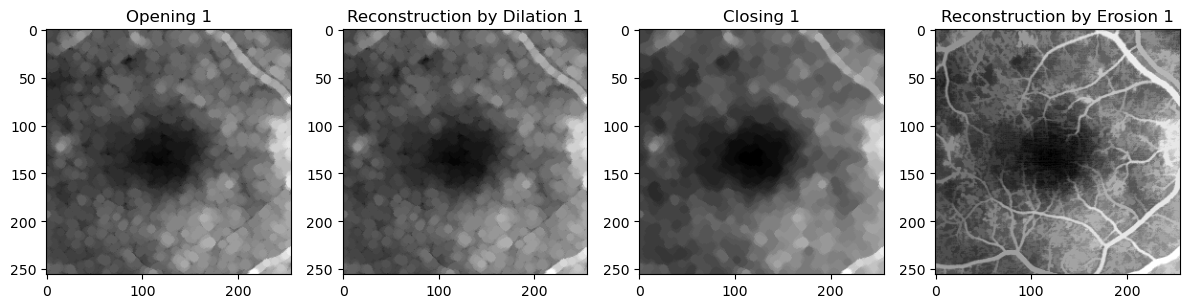

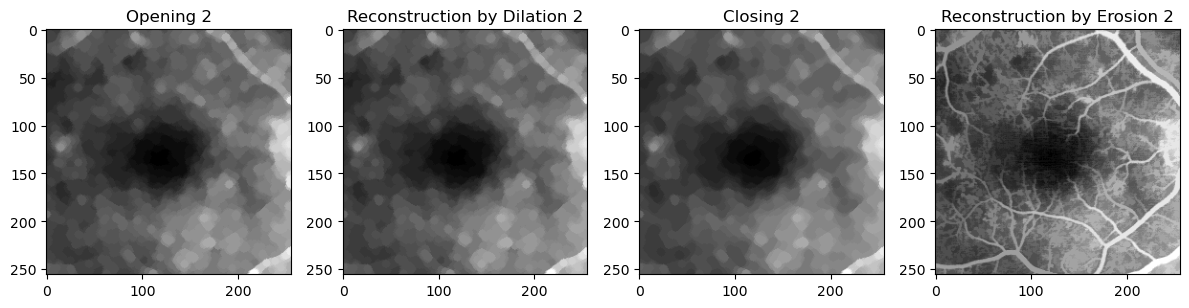

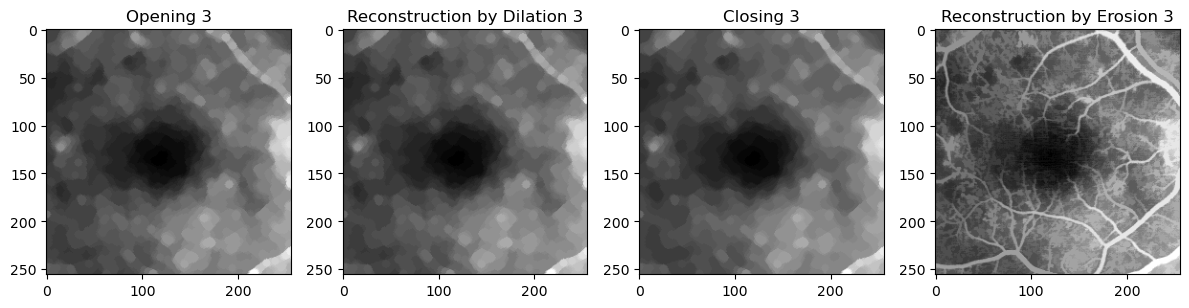

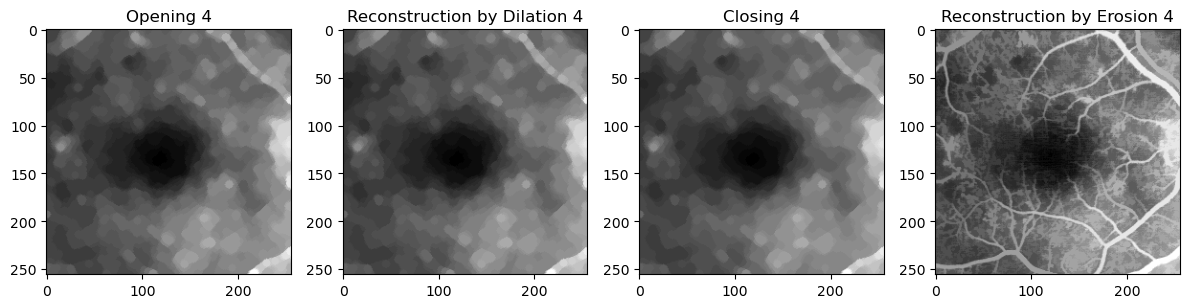

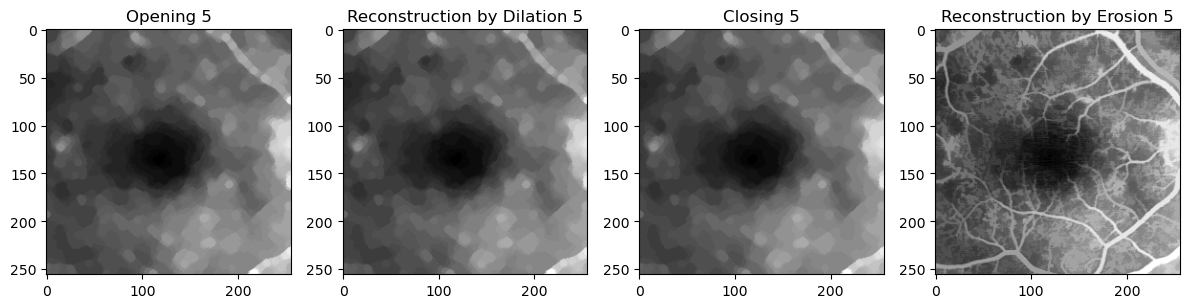

In [ ]:
# Load the image
im = skio.imread('retina2.gif')

# Define the structuring element (e.g., disk with a radius of 4)
se4 = strel('disk',4)

# Create lists to store intermediate results

opening_results = []
reconstruction_dilation_results = []
closing_results = []
reconstruction_erosion_results = []

# Initial marker image for reconstruction
marker_image = im

# Perform alternate sequential filter
for i in range(5):  # You can adjust the number of iterations
    # Opening
    opened = opening(marker_image, se4)
    opening_results.append(opened)

    # Reconstruction by dilation
    rec_dilation = reconstruction(opened, np.minimum(marker_image, opened))
    reconstruction_dilation_results.append(rec_dilation)

    # Closing
    closed = closing(rec_dilation, se4)
    closing_results.append(closed)

    # Reconstruction by erosion
    rec_erosion = reconstruction(closed, np.maximum(closed, marker_image))
    reconstruction_erosion_results.append(rec_erosion)

    # Update marker image for the next iteration
    marker_image = rec_erosion

# Plot and comment on the results
for i in range(len(opening_results)):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(opening_results[i], cmap="gray")
    plt.title(f"Opening {i+1}")

    plt.subplot(1, 4, 2)
    plt.imshow(reconstruction_dilation_results[i], cmap="gray")
    plt.title(f"Reconstruction by Dilation {i+1}")

    plt.subplot(1, 4, 3)
    plt.imshow(closing_results[i], cmap="gray")
    plt.title(f"Closing {i+1}")

    plt.subplot(1, 4, 4)
    plt.imshow(reconstruction_erosion_results[i], cmap="gray")
    plt.title(f"Reconstruction by Erosion {i+1}")

    plt.tight_layout()
    plt.show()


# 4 Segmentation

**1. Compute the morphological gradient (dilation - erosion with an elementary structuring
element, of size 1), for instance on image bat200.bmp. Comment the results.**

It is used to highlight and emphasize the boundaries or edges of objects in a binary or grayscale image. The morphological gradient is typically computed by taking the difference between the dilation and erosion of an image using a structuring element. It can help in segmenting objects and is a fundamental tool in image processing and computer vision for various applications, including object recognition, image segmentation, and feature extraction.

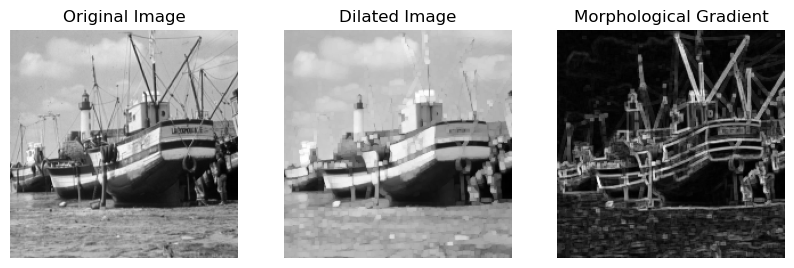

In [ ]:

# Load the image
im = skio.imread("bat200.bmp")

# Define the structuring element
se = strel('square',3)

# Perform dilation and erosion
dilated = dilation(im, se)
eroded = erosion(im, se)

# Compute the morphological gradient
im_gradient = dilated - eroded

# Display the original image and the morphological gradient
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.title("Original Image")
plt.imshow(im, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title("Dilated Image")
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title("Morphological Gradient")
plt.imshow(im_gradient, cmap='gray')
plt.axis('off')

plt.show()


**2. Compute the watershed on this gradient image (see the corresponding section in the code).
Comment the results. For the visualization, the watershed lines (having value 0 in the
result) can be superimposed on the original image.**

Watershed segmentation is a technique used for image segmentation, particularly in cases where objects touch or overlap. The watershed lines represent the boundaries between different regions in the image.The watershed algorithm is typically applied to the gradient image.The algorithm treats the image as a topographic map where intensity values represent the heights of the terrain.
* Image Gradient: The first step is to compute the gradient of the image.
* Marker Generation: Markers are typically generated by thresholding the gradient image. These markers represent the initial segmentation regions or basins.
* Watershed Transformation: The algorithm treats the image as a landscape, with the intensity values as heights. It starts to "fill" basins with water from the markers. When two "water basins" merge, a dam is built between them, preventing further merging. This process continues until all basins are filled or until the dam height corresponds to a watershed line.
* Watershed Lines: The watershed lines are the boundaries where dams were built. These lines separate the segmented regions.

Note : I could not use this funcation in my notebook (local_mini = skf.peak_local_max(255-grad,indices=False))


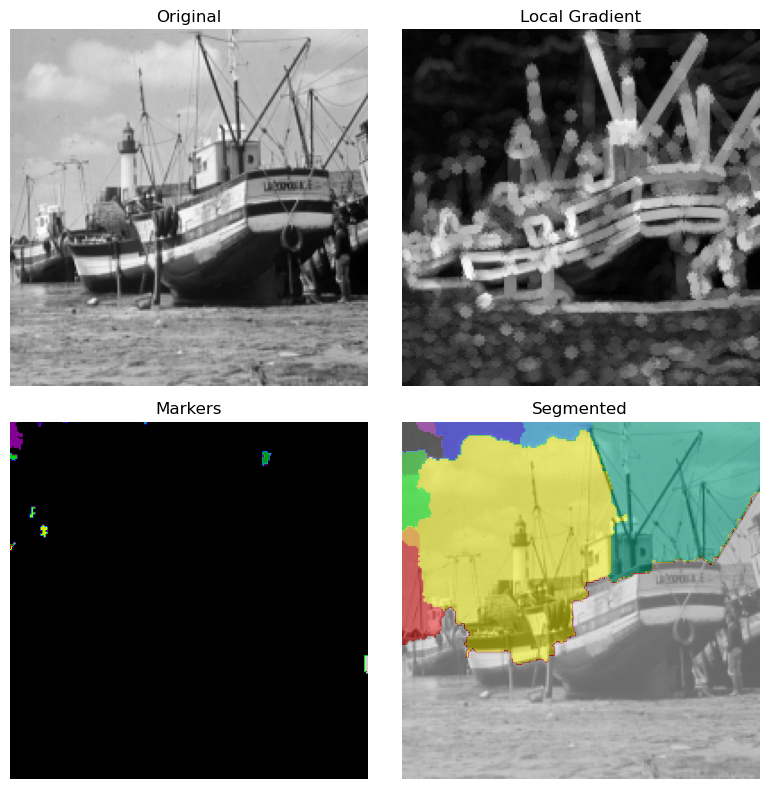

In [ ]:
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage.morphology import disk
im = skio.imread("bat200.bmp")

# Define the structuring element
se = strel('disk',3)

# Perform dilation and erosion
dilated = dilation(im, se)
eroded = erosion(im, se)

# Compute the morphological gradient
im_gradient = dilated - eroded



# find continuous region (low gradient -
# where less than 10 for this image) --> markers

#The threshold
markers = rank.gradient(im_gradient, disk(5)) < 5 #Return local gradient of an image
markers = ndi.label(markers)[0]

# process the watershed
labels = watershed(im_gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Original")
#cmap=plt.cm.nipy_spectral,
ax[1].imshow(im_gradient,    cmap='gray')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(im, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

**3. Try to improve the result by filtering the original image by an appropriate morphological
filter and/or by filtering the gradient image by a closing, before computing the watersheds.**

To improve the performance of the segmentation by the watershed algorithm, we can use algorithms morphological Filters or smoothing techniques on the original image or on the gradient image, and changing the shape and size of the SE has a direct effect as a result. In this example, we use the opening filter on the original photo and the closing filter on the gradient photo, and the result is much better.

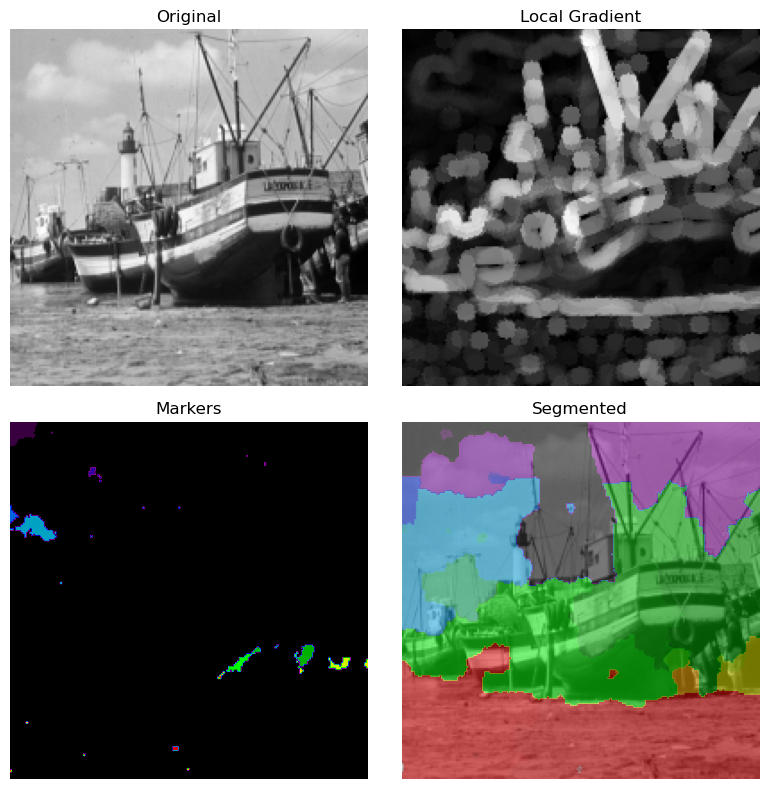

In [ ]:
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage.morphology import disk
im = skio.imread("bat200.bmp")
se = strel('disk',5)

#apply opening to orginal image
results=opening(im,se)

# Perform dilation and erosion
se1 = strel('disk',5)
dilated = dilation(results, se1)
eroded = erosion(results, se1)

# Compute the morphological gradient
im_gradient = dilated - eroded


#apply closing to gradient image
se3 = strel('disk',1)
results_gradient=closing(im_gradient,se3)

# find continuous region (low gradient -
# where less than 10 for this image) --> markers

markers = rank.gradient(results_gradient, disk(5)) < 5 #Return local gradient of an image
markers = ndi.label(markers)[0]

# process the watershed
labels = watershed(results_gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Original")
#cmap=plt.cm.nipy_spectral,
ax[1].imshow(im_gradient,    cmap='gray')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(im, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

**4. Eliminate regional minima with a dynamic less that some value before applying the watershed.
Explain the sequence of operations and comment the results.**

Eliminating regional minima with a dynamic threshold before applying the watershed algorithm can help improve segmentation results by preventing over-segmentation.The maximum gradient value is then multiplied by 0.4. This scaling factor (0.4) is used to set a threshold value for the gradient image. The result is the dynamic threshold.The dynamic threshold is set to 40% (0.4) of the maximum gradient value. This means that the threshold will be relatively high, allowing only those regions with relatively high gradient values to be considered as markers.A higher threshold value (like 10% or 20%) would make the threshold more stringent, and only the very pronounced edges in the gradient image would be considered as markers. This could lead to under-segmentation, where smaller details or lower-contrast boundaries may be missed.
In contrast, a lower threshold value (like 60% or 70%) would make the threshold less stringent, allowing smaller gradient changes to be considered as markers. This could lead to over-segmentation, where smaller regions are unnecessarily split into multiple segments.By setting a dynamic threshold at 40% of the maximum gradient value, we are likely to obtain a balance between these extremes.


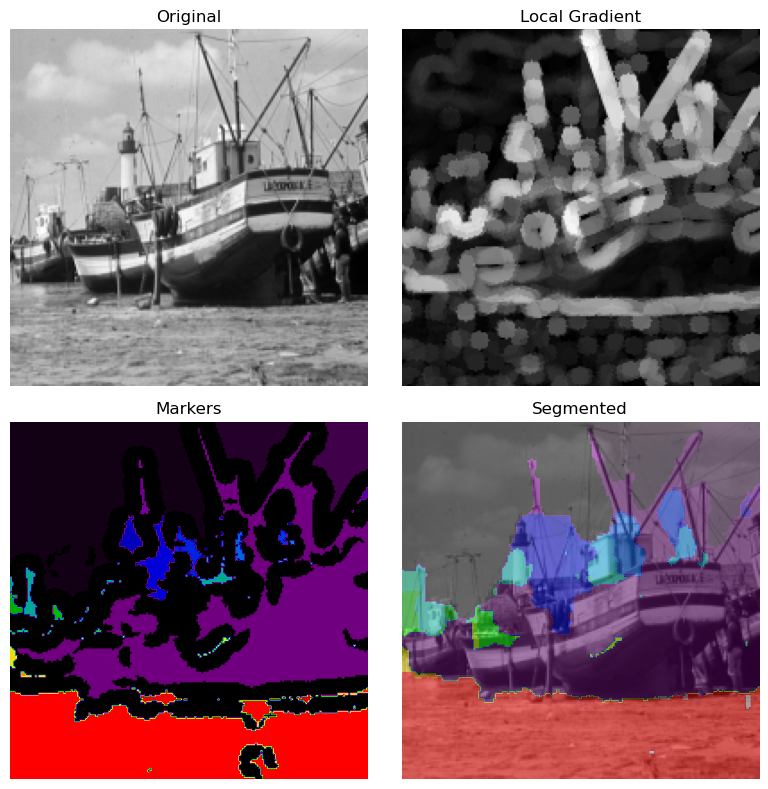

In [ ]:
from skimage.filters import rank
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import io as skio
from skimage.morphology import opening, closing, dilation, erosion
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

# Load the image
im = skio.imread("bat200.bmp")

# Define the structuring element for opening
se_opening = strel('disk', 5)

# Apply opening to the original image
opened_im = opening(im, se_opening)

# Define the structuring element for dilation and erosion
se_dilation_erosion = strel('disk', 5)

# Perform dilation and erosion
dilated = dilation(opened_im, se_dilation_erosion)
eroded = erosion(opened_im, se_dilation_erosion)

# Compute the morphological gradient
im_gradient = dilated - eroded

# Define the structuring element for closing
se_closing = strel('disk', 1)

# Apply closing to the gradient image
closed_gradient = closing(im_gradient, se_closing)

# Calculate a dynamic threshold
#calculates the maximum value in the closed_gradient image and it finds the highest gradient value in the entire image
dynamic_threshold = 0.4 * np.max(closed_gradient)

# Find markers for watershed segmentation using the dynamic threshold
markers = rank.gradient(closed_gradient, disk(5)) < dynamic_threshold
markers = ndi.label(markers)[0]

# Process the watershed
labels = watershed(closed_gradient, markers)

# Display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(im_gradient, cmap='gray')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(im, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


**5. Define markers (manually or using a dedicated pre-processing), inside the object to be
segmented, and outside of it (e.g. on the image border). Let m be the marker, such that m
takes value 0 in the marked regions and 255 elsewhere. Compute I0 = I ^m, where I is the
image on which we want to compute the watershed (e.g. gradient, or the inverted image
in the case of laiton.bmp, etc.). Reconstruct I0 by erosion from m. The reconstructed
image should have minima only in the regions defined by m. Compute the watersheds of
the reconstructed image. Comment the results.**

Our image contains many objects, manually defining markers for each object may not be practical. In such cases, we can use automated methods to generate markers based on image features. One common approach is to use gradient or intensity information to identify markers.The use of markers is a common approach to control and refine the segmentation results.we define markers within the object to be segmented and outside of it. Markers are typically binary images where the marked regions are assigned a value of 0, and the rest are assigned a value of 255.I0 having minima in the regions defined by the markers. This means that the marked regions in I0 will be preserved, and the rest of the image will be suppressed.The goal is to create an image that has minima only in the regions defined by the markers. Erosion will help to fill in the regions between the markers and create a more complete segmentation map.

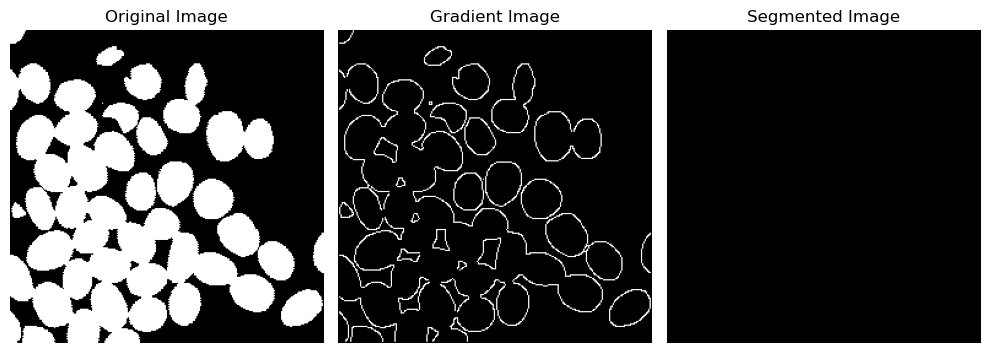

In [ ]:
import numpy as np
from skimage import io, feature
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from skimage.segmentation import watershed

# Load image
gray_image = io.imread('cafe.bmp', as_gray=True)

# Compute markers using gradient or other features
gradient = feature.canny(gray_image)
distance = ndi.distance_transform_edt(gradient)
markers = peak_local_max(distance, min_distance=5, exclude_border=False)

# Create markers with the same shape as the image
markers_image = np.zeros_like(gray_image)
markers_image[markers[:, 0], markers[:, 1]] = 1  # Set marker regions to 1

# Compute I0 by combining the markers with the original image
marked_image = gray_image.copy()
marked_image[markers_image == 1] = 0  # Set marker regions to 0

# Reconstruct I0 using erosion
reconstructed_image = morphology.dilation(marked_image, morphology.disk(5))

# Apply watershed segmentation
segmented = watershed(reconstructed_image, markers_image)

# Display the segmented image
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()



**6. How could the watersheds be used to segment the black lines in image bulles.bmp or laiton.bmp? Discuss the different steps of the method you propose.**

we compute the gradient image. The gradient image highlights changes in intensity, which is essential for segmenting features like lines. we define markers that represent the desired regions. We apply binary thresholding using Otsu's method, which automatically calculates an optimal threshold value to separate the lines from the background. we apply morphological closing to connect gaps in the markers. we apply morphological opening to separate markers that are too close. we use the watershed algorithm with the refined markers and the original gradient image. The watershed algorithm will segment the lines based on the marker locations and gradient information.

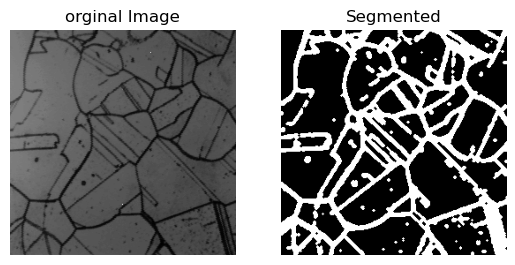

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, segmentation
from scipy import ndimage
from skimage.morphology import disk
from skimage.filters import threshold_otsu

#Load the image
image = io.imread("laiton.bmp", as_gray=True)
se = strel('square',3)


# Perform dilation and erosion
dilated = dilation(image, se)
eroded = erosion(image, se)

# Compute the morphological gradient
#because we have better result
im_gradient = dilated - eroded

#for reduce the noise and fill the hole
im_gradient =opening(im_gradient, disk(1))
im_gradient =closing(im_gradient, disk(1))

# Apply binary thresholding using Otsu's method
threshold_value = threshold_otsu(im_gradient)
binary_image = im_gradient > threshold_value
# Invert the binary image to have lines as 0 and background as 255
#we have better result without invert
#binary_image = 1 - binary_image


# Apply morphological operations for better result
binary_image = morphology.binary_opening(binary_image, disk(1))
binary_image = morphology.binary_erosion(binary_image, disk(1))
binary_image = morphology.binary_dilation(binary_image, disk(1))

# Display the binary image
plt.subplot(121)
plt.title("orginal Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title("Segmented")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

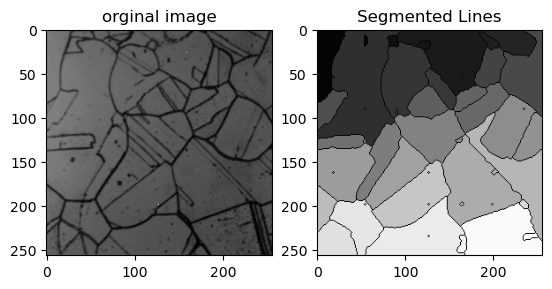

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, segmentation
from scipy import ndimage
from skimage.morphology import disk

# Load the image
im = io.imread("laiton.bmp", as_gray=True)  # Load the image as grayscale

# Apply Gaussian blur to reduce noise
image = filters.gaussian(image, sigma=3)



se = strel('square',3)

# Perform dilation and erosion
dilated = dilation(im, se)
eroded = erosion(im, se)

# Compute the morphological gradient
#because we have better result
im_gradient = dilated - eroded



# Thresholding to create a binary mask
threshold_value = filters.threshold_otsu(im_gradient)
binary_mask = im_gradient > threshold_value

binary_mask = 1 - binary_mask

# Apply morphological operations for better result

binary_mask = morphology.binary_opening(binary_mask, disk(1))
binary_mask = morphology.binary_erosion(binary_mask, disk(1))
binary_mask = morphology.binary_dilation(binary_mask, disk(1))


# Compute the distance transform
distance_transform = ndimage.distance_transform_edt(binary_mask)

# Apply watershed segmentation
markers = segmentation.watershed(-distance_transform, markers=50,watershed_line=True)

# Display the segmented lines

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title('orginal image')


plt.subplot(122)
plt.imshow(markers, cmap='gray')
plt.title('Segmented Lines')
plt.show()



